First Few Rows of the Dataset:
                         url        type
0     https://www.google.com  legitimate
1    https://www.youtube.com  legitimate
2   https://www.facebook.com  legitimate
3      https://www.baidu.com  legitimate
4  https://www.wikipedia.org  legitimate

Dataset Structure and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     450176 non-null  object
 1   type    450176 non-null  object
dtypes: object(2)
memory usage: 6.9+ MB
None

Summary Statistics for Numeric Columns:
                           url        type
count                   450176      450176
unique                  450176           2
top     https://www.google.com  legitimate
freq                         1      345738

Checking for Missing Values:
url     0
type    0
dtype: int64

Distribution of URLs per Type:
type
legitimate    345738
phishing

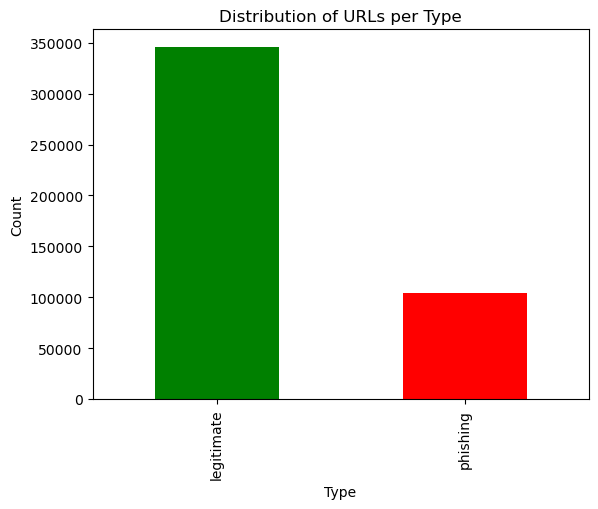


Extracting Features...

Feature-Engineered Dataset:
   url_length  num_dots  num_hyphens  num_underscores  num_digits  \
0          22         2            0                0           0   
1          23         2            0                0           0   
2          24         2            0                0           0   
3          21         2            0                0           0   
4          25         2            0                0           0   

   num_special_chars  domain_length  subdomain_length  path_length  label  
0                  5              6                 3           14      0  
1                  5              7                 3           15      0  
2                  5              8                 3           16      0  
3                  5              5                 3           13      0  
4                  5              9                 3           17      0  

Feature Analysis:
          url_length       num_dots    num_hyphens  num_u

C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:52:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost saved as 'xgboost_model.pkl'


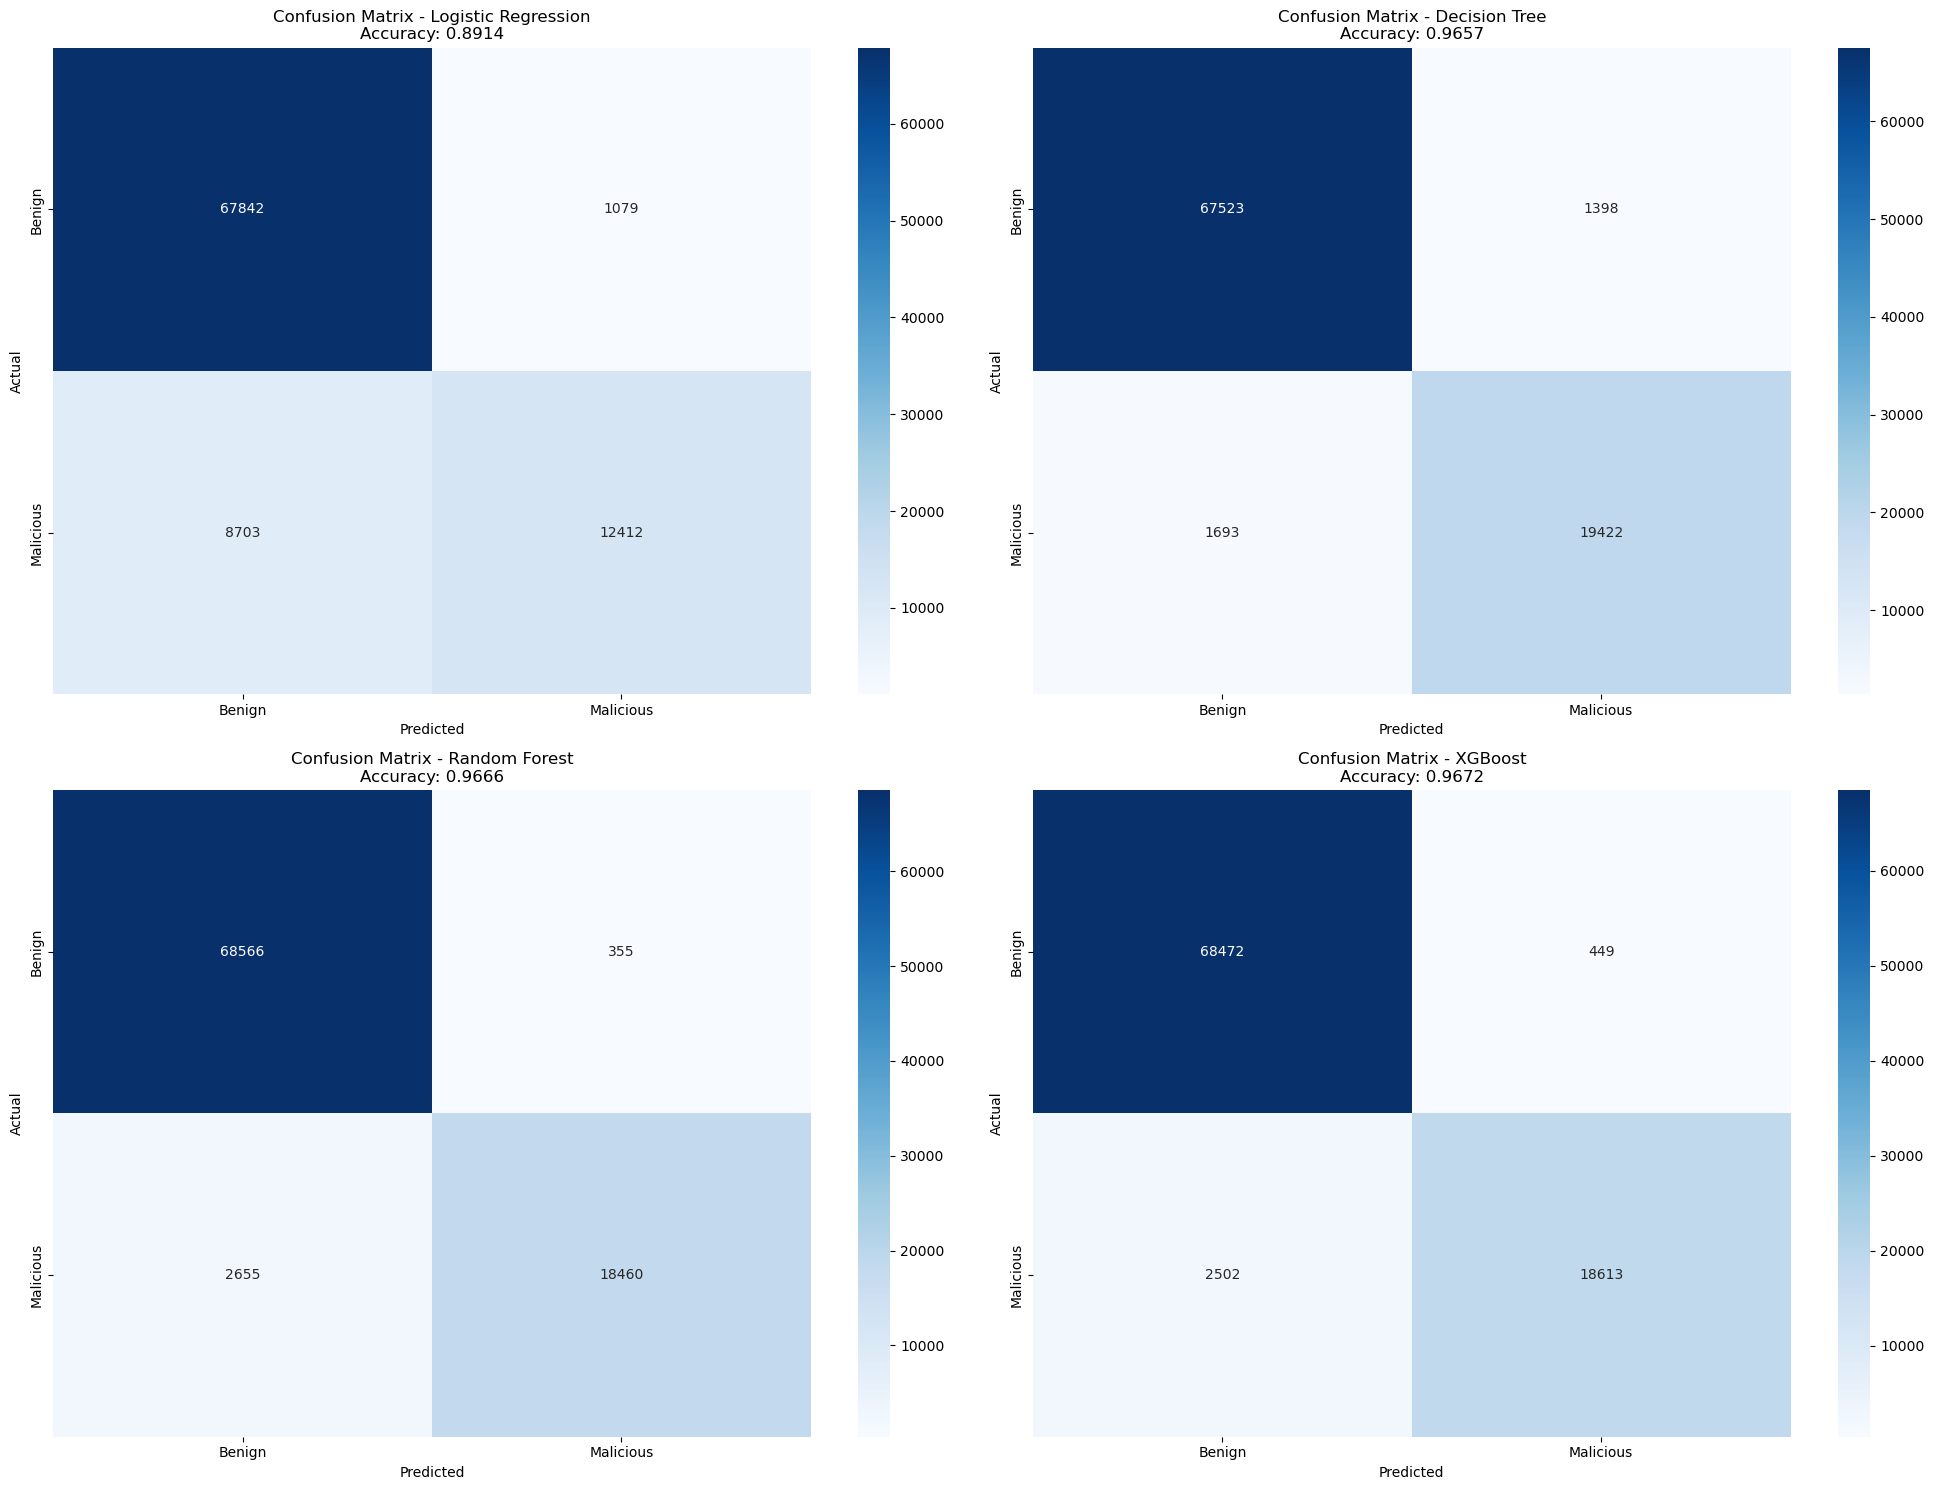


Detailed Performance Metrics:
--------------------------------------------------

Logistic Regression Metrics:
Accuracy: 0.8914
True Negatives (Benign correctly identified): 67842
False Positives (Benign misclassified as Malicious): 1079
False Negatives (Malicious misclassified as Benign): 8703
True Positives (Malicious correctly identified): 12412
Precision: 0.9200
Recall (Sensitivity): 0.5878
Specificity: 0.9843
F1 Score: 0.7173
--------------------------------------------------

Decision Tree Metrics:
Accuracy: 0.9657
True Negatives (Benign correctly identified): 67523
False Positives (Benign misclassified as Malicious): 1398
False Negatives (Malicious misclassified as Benign): 1693
True Positives (Malicious correctly identified): 19422
Precision: 0.9329
Recall (Sensitivity): 0.9198
Specificity: 0.9797
F1 Score: 0.9263
--------------------------------------------------

Random Forest Metrics:
Accuracy: 0.9666
True Negatives (Benign correctly identified): 68566
False Positives (Beni

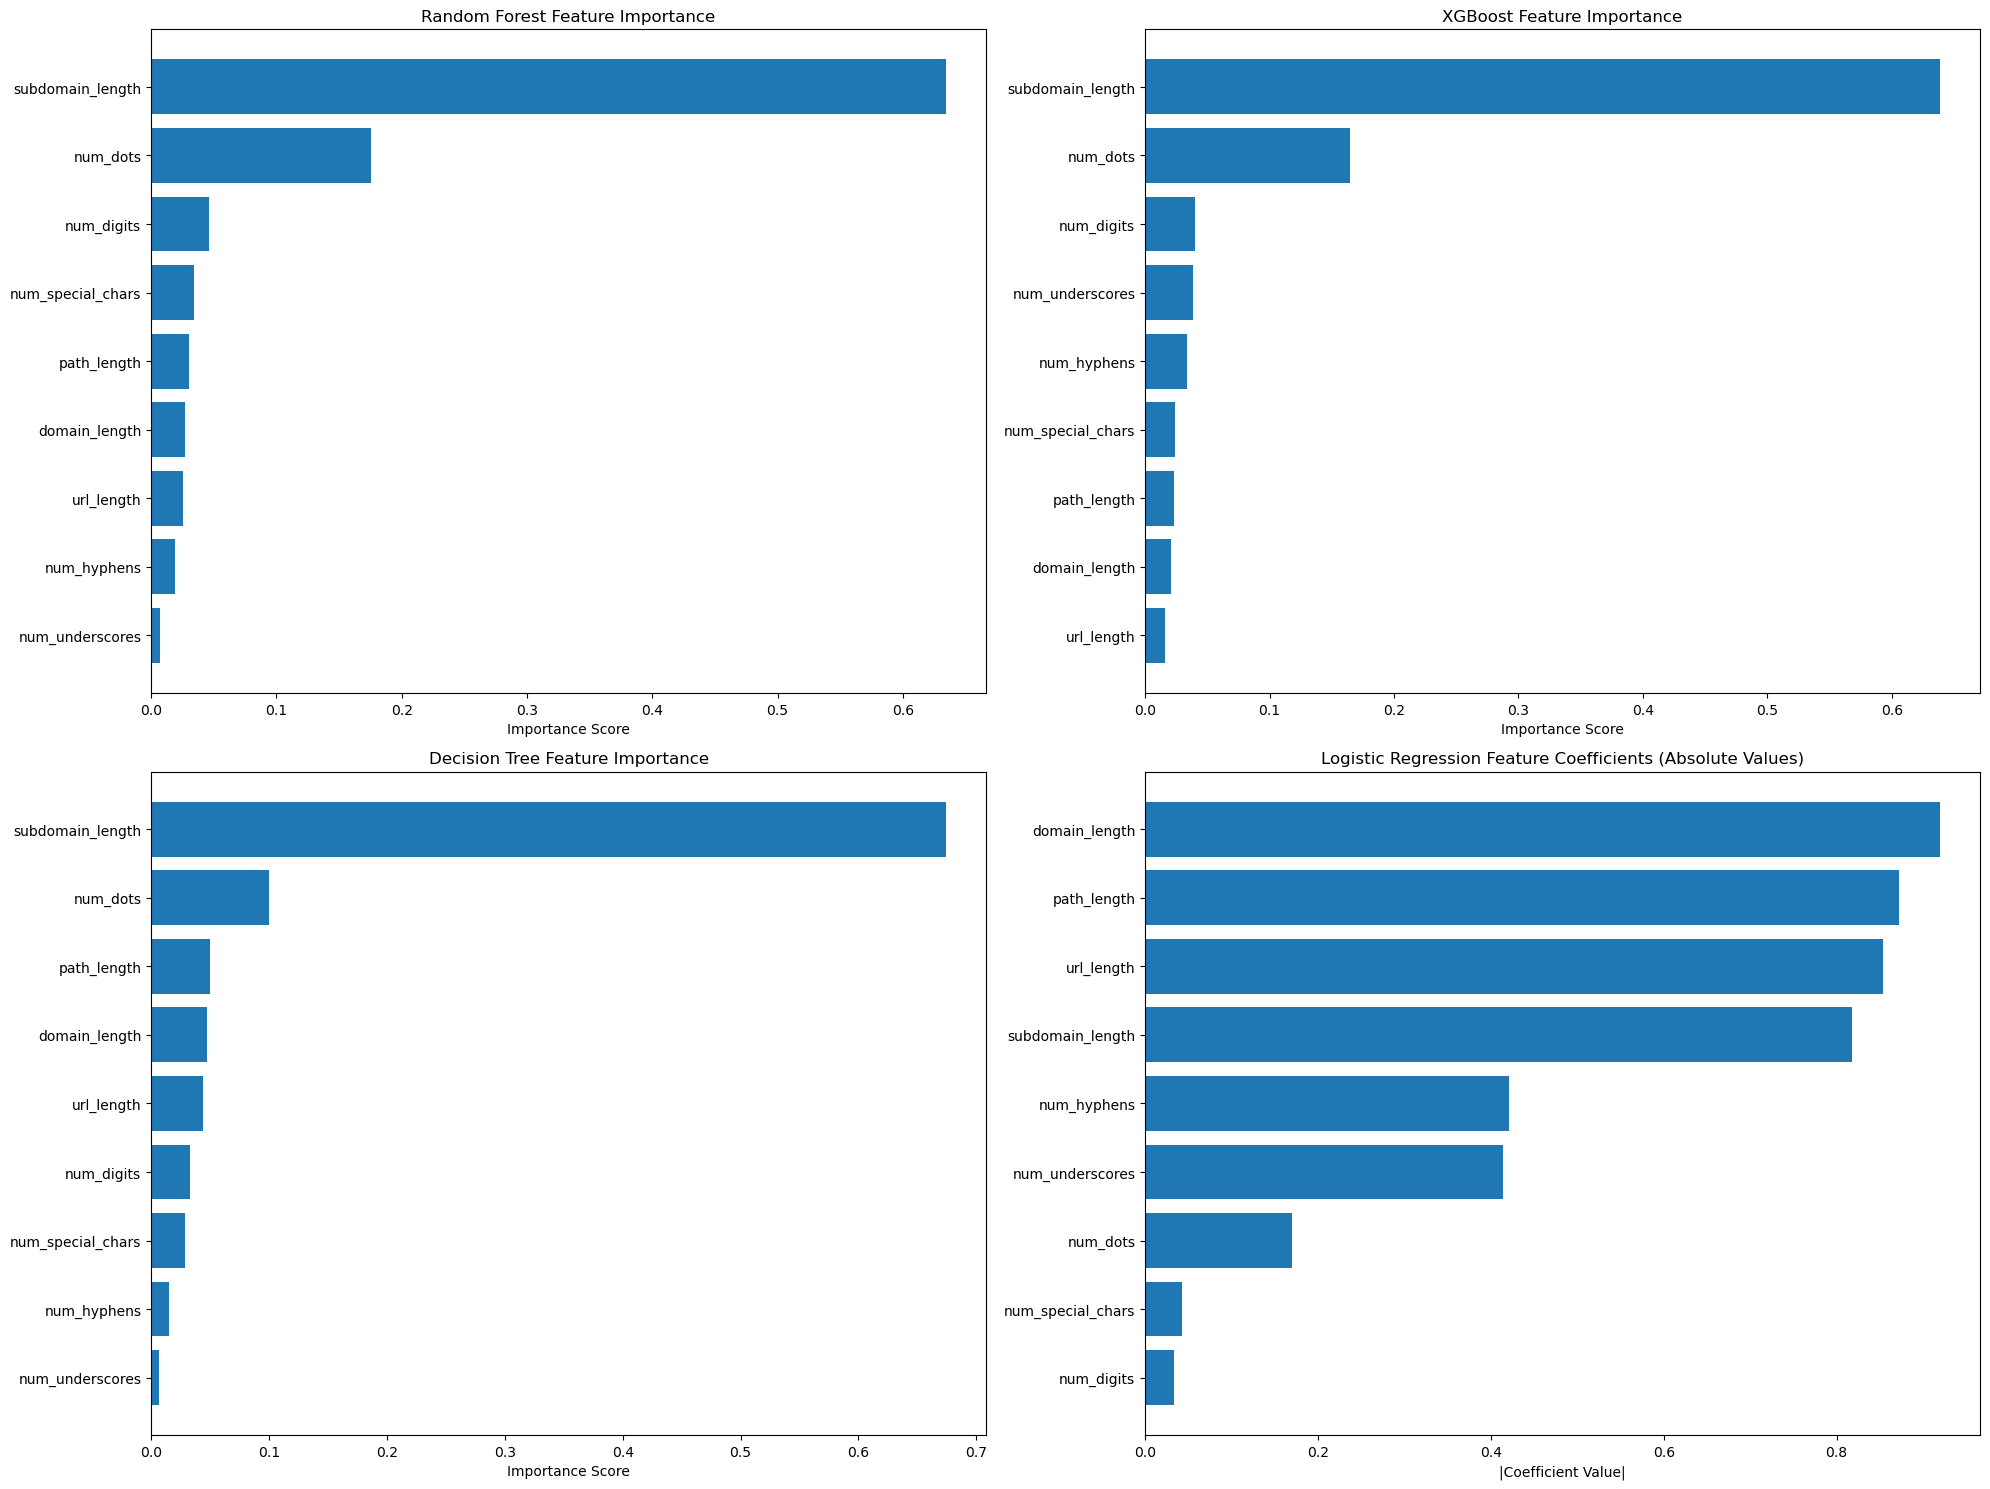


Feature Importance Rankings by Model:
--------------------------------------------------

Logistic Regression Top Features:
domain_length: 0.9199
path_length: 0.8719
url_length: 0.8538
subdomain_length: 0.8178
num_hyphens: 0.4209
num_underscores: 0.4138
num_dots: 0.1699
num_special_chars: 0.0424
num_digits: 0.0333
-------------------------

Decision Tree Top Features:
subdomain_length: 0.6745
num_dots: 0.1004
path_length: 0.0498
domain_length: 0.0470
url_length: 0.0443
num_digits: 0.0327
num_special_chars: 0.0292
num_hyphens: 0.0154
num_underscores: 0.0068
-------------------------

Random Forest Top Features:
subdomain_length: 0.6346
num_dots: 0.1757
num_digits: 0.0461
num_special_chars: 0.0345
path_length: 0.0305
domain_length: 0.0269
url_length: 0.0259
num_hyphens: 0.0190
num_underscores: 0.0068
-------------------------

XGBoost Top Features:
subdomain_length: 0.6389
num_dots: 0.1644
num_digits: 0.0399
num_underscores: 0.0385
num_hyphens: 0.0335
num_special_chars: 0.0242
path_leng

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Added confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import seaborn as sns  # Added seaborn for heatmap
import tldextract
import re
import joblib
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('C:/Users/Admin/Desktop/Horizontal App/Mandlay URL Dataset/URL dataset.csv')

# Inspect the first few rows
print("First Few Rows of the Dataset:")
print(data.head())

# Check the structure and data types
print("\nDataset Structure and Data Types:")
print(data.info())

# Summary statistics for numeric columns (if any)
print("\nSummary Statistics for Numeric Columns:")
print(data.describe())

# Check for missing values
print("\nChecking for Missing Values:")
print(data.isnull().sum())

# Distribution of URLs per Type
print("\nDistribution of URLs per Type:")
print(data['type'].value_counts())

# Visualize the distribution
data['type'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of URLs per Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Encode the 'type' column
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['type'])
data = data.drop(columns=['type'])

# Function to extract features from a URL
def extract_features(url):
    features = {}
    features['url_length'] = len(url)
    features['num_dots'] = url.count('.')
    features['num_hyphens'] = url.count('-')
    features['num_underscores'] = url.count('_')
    features['num_digits'] = sum(c.isdigit() for c in url)
    features['num_special_chars'] = len(re.findall(r'[^A-Za-z0-9]', url))
    
    ext = tldextract.extract(url)
    features['domain_length'] = len(ext.domain)
    features['subdomain_length'] = len(ext.subdomain)
    features['path_length'] = len(url.split('/', 3)[-1]) if '/' in url else 0
    
    return features

# Apply feature extraction
print("\nExtracting Features...")
features_df = data['url'].apply(lambda x: pd.Series(extract_features(x)))
final_data = pd.concat([features_df, data['label']], axis=1)

# Inspect the feature-engineered dataset
print("\nFeature-Engineered Dataset:")
print(final_data.head())

# Analyze features
print("\nFeature Analysis:")
print(final_data.describe())

# Check for missing values in the new feature set
print("\nChecking for Missing Values in Features:")
print(final_data.isnull().sum())

# Define features (X) and target (y)
X = final_data.drop(columns=['label'])
y = final_data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Define models with the optimized Random Forest
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=50,          # Reduced number of trees
        min_samples_leaf=5,       # Increased minimum samples per leaf
        min_samples_split=10,     # Increased minimum samples required to split
        max_depth=20,             # Limited tree depth
        n_jobs=-1,                # Use all available cores
        random_state=42
    ),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train models and evaluate with confusion matrices
results = {}
plt.figure(figsize=(20, 15))

for idx, (model_name, model) in enumerate(models.items(), 1):
    # Train the model
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    
    # Generate predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'predictions': y_pred
    }
    
    # Plot confusion matrix
    plt.subplot(2, 2, idx)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Benign', 'Malicious'],
                yticklabels=['Benign', 'Malicious'])
    
    plt.title(f'Confusion Matrix - {model_name}\nAccuracy: {accuracy:.4f}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # Save the model
    model_file = f"{model_name.replace(' ', '_').lower()}_model.pkl"
    joblib.dump(model, model_file)
    print(f"{model_name} saved as '{model_file}'")

plt.tight_layout()
plt.show()

# Print detailed metrics for each model
print("\nDetailed Performance Metrics:")
print("-" * 50)

for model_name, result in results.items():
    cm = result['confusion_matrix']
    tn, fp, fn, tp = cm.ravel()
    
    # Calculate additional metrics
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    specificity = tn / (tn + fp)
    
    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"True Negatives (Benign correctly identified): {tn}")
    print(f"False Positives (Benign misclassified as Malicious): {fp}")
    print(f"False Negatives (Malicious misclassified as Benign): {fn}")
    print(f"True Positives (Malicious correctly identified): {tp}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 50)

# Create feature importance plots for all models
plt.figure(figsize=(20, 15))

# 1. Random Forest Feature Importance
plt.subplot(2, 2, 1)
rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': models['Random Forest'].feature_importances_
}).sort_values('importance', ascending=True)

plt.barh(range(len(rf_importance)), rf_importance['importance'])
plt.yticks(range(len(rf_importance)), rf_importance['feature'])
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')

# 2. XGBoost Feature Importance
plt.subplot(2, 2, 2)
xgb_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': models['XGBoost'].feature_importances_
}).sort_values('importance', ascending=True)

plt.barh(range(len(xgb_importance)), xgb_importance['importance'])
plt.yticks(range(len(xgb_importance)), xgb_importance['feature'])
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance Score')

# 3. Decision Tree Feature Importance
plt.subplot(2, 2, 3)
dt_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': models['Decision Tree'].feature_importances_
}).sort_values('importance', ascending=True)

plt.barh(range(len(dt_importance)), dt_importance['importance'])
plt.yticks(range(len(dt_importance)), dt_importance['feature'])
plt.title('Decision Tree Feature Importance')
plt.xlabel('Importance Score')

# 4. Logistic Regression Coefficients
plt.subplot(2, 2, 4)
lr_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(models['Logistic Regression'].coef_[0])  # Using absolute values
}).sort_values('importance', ascending=True)

plt.barh(range(len(lr_importance)), lr_importance['importance'])
plt.yticks(range(len(lr_importance)), lr_importance['feature'])
plt.title('Logistic Regression Feature Coefficients (Absolute Values)')
plt.xlabel('|Coefficient Value|')

plt.tight_layout()
plt.show()

# Print numerical values for each model
print("\nFeature Importance Rankings by Model:")
print("-" * 50)

for model_name, model in models.items():
    print(f"\n{model_name} Top Features:")
    if model_name == "Logistic Regression":
        importance = pd.DataFrame({
            'feature': X.columns,
            'importance': abs(model.coef_[0])
        }).sort_values('importance', ascending=False)
    else:
        importance = pd.DataFrame({
            'feature': X.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
    
    # Print top features with their importance scores
    for idx, row in importance.iterrows():
        print(f"{row['feature']}: {row['importance']:.4f}")
    print("-" * 25)

# Calculate feature importance consistency
print("\nFeature Importance Consistency Analysis:")
print("-" * 50)

# Create rankings for each model
rankings = {}
for model_name, model in models.items():
    if model_name == "Logistic Regression":
        importance = pd.DataFrame({
            'feature': X.columns,
            'importance': abs(model.coef_[0])
        }).sort_values('importance', ascending=False)
    else:
        importance = pd.DataFrame({
            'feature': X.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
    
    rankings[model_name] = importance['feature'].tolist()

# Find features that appear in top 3 across multiple models
top_features = set()
for model_rankings in rankings.values():
    top_features.update(model_rankings[:3])

print("\nFeatures appearing in top 3 across models:")
for feature in top_features:
    models_ranking = []
    for model_name, ranking in rankings.items():
        rank = ranking.index(feature) + 1
        if rank <= 3:
            models_ranking.append(f"{model_name} (Rank: {rank})")
    
    if len(models_ranking) > 1:
        print(f"\n{feature}:")
        for model_rank in models_ranking:
            print(f"  - {model_rank}")